In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../data/Health Screening Data.csv', index_col= None)

In [3]:
data.columns

Index(['Unnamed: 0', 'id', 'age', 'gender', 'height', 'weight', 'ap_hi',
       'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio',
       'AgeinYr', 'BMI', 'BMICat', 'AgeGroup'],
      dtype='object')

In [4]:
data.shape

(69960, 18)

In [5]:
data = data.drop(columns=['Unnamed: 0', 'id',])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69960 entries, 0 to 69959
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          69960 non-null  int64  
 1   gender       69960 non-null  int64  
 2   height       69960 non-null  int64  
 3   weight       69960 non-null  float64
 4   ap_hi        69960 non-null  int64  
 5   ap_lo        69960 non-null  int64  
 6   cholesterol  69960 non-null  int64  
 7   gluc         69960 non-null  int64  
 8   smoke        69960 non-null  int64  
 9   alco         69960 non-null  int64  
 10  active       69960 non-null  int64  
 11  cardio       69960 non-null  int64  
 12  AgeinYr      69960 non-null  int64  
 13  BMI          69960 non-null  float64
 14  BMICat       69960 non-null  object 
 15  AgeGroup     69960 non-null  object 
dtypes: float64(2), int64(12), object(2)
memory usage: 8.5+ MB


In [7]:
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,AgeinYr,BMI,BMICat,AgeGroup
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,22.0,Normal,40-60
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.9,Obese,40-60
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.5,Normal,40-60
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.7,Over Weight,40-60
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.0,Normal,40-60


**Exploramos Feature "age"**

In [8]:
data.age.value_counts()

18236    32
19741    32
20442    31
20376    31
18253    31
         ..
16167     1
17768     1
21497     1
23672     1
14329     1
Name: age, Length: 8076, dtype: int64

 Feature 'age'--> divide edad en días, no pareciera muy útil para el proyecto, se propone dropear

In [9]:
data = data.drop(columns=['age'])

**Exploramos Feature "AgeGroup"** --> divide edad en 3 categorias muy amplias y desbalanceadas

In [10]:
data.AgeGroup.value_counts()

40-60    56712
>60       9844
20-40     3404
Name: AgeGroup, dtype: int64

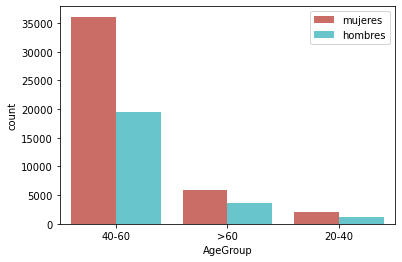

In [95]:
ax = sns.countplot(x="AgeGroup", data=data, hue= 'gender', palette="hls")
plt.legend(["mujeres", 'hombres'])

**Feature "AgeGroup"** --> divide edad en 3 categorias muy amplias y desbalanceadas. Se propone dropear y utilizar otras categorías a partir de Feature 'AgeinYR'

**Exploramos Feature "AgeinYr"** 

<AxesSubplot:xlabel='AgeinYr'>

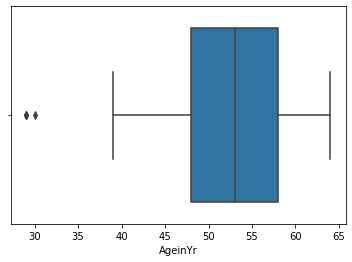

In [12]:
sns.boxplot(data= data,x='AgeinYr')


In [13]:
data.AgeinYr.value_counts().sort_index()

29       3
30       1
39    1779
40    1621
41    1902
42    1418
43    2029
44    1512
45    2086
46    1622
47    2196
48    1810
49    3415
50    3213
51    3366
52    3279
53    3866
54    3603
55    3926
56    3605
57    3682
58    3408
59    3575
60    3199
61    2727
62    2197
63    2734
64    2186
Name: AgeinYr, dtype: int64

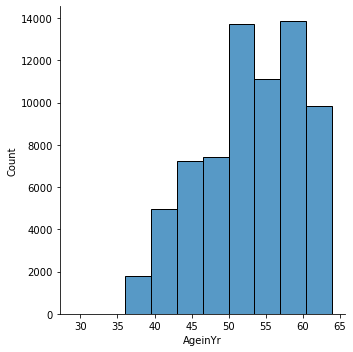

In [14]:
sns.displot(data.AgeinYr, bins = 10, palette='Set2')


In [15]:
data.AgeinYr.describe()

count    69960.000000
mean        52.841109
std          6.766655
min         29.000000
25%         48.000000
50%         53.000000
75%         58.000000
max         64.000000
Name: AgeinYr, dtype: float64

**Feature "AgeinYR"** --> se propone conservar feature pero también discretizar en categorias

In [16]:
#Discretizacion de variables Age

bins = [0, 30, 40, 50, 60, 70]
AgeCat = pd.cut(data.AgeinYr, bins, right = False)

data['AgeCat'] = AgeCat



In [17]:
data['AgeCat'].value_counts()

[50, 60)    35523
[40, 50)    19611
[60, 70)    13043
[30, 40)     1780
[0, 30)         3
Name: AgeCat, dtype: int64

**Exploramos Feature "height"** 

In [18]:
data.height.value_counts()

165    5852
160    5019
170    4676
168    4395
164    3393
       ... 
81        1
80        1
207       1
76        1
64        1
Name: height, Length: 109, dtype: int64

<AxesSubplot:xlabel='height'>

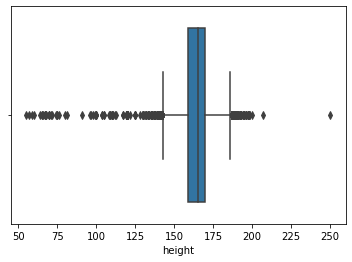

In [19]:
sns.boxplot(data= data,x='height')


In [20]:
data.height.describe()

count    69960.000000
mean       164.359105
std          8.210541
min         55.000000
25%        159.000000
50%        165.000000
75%        170.000000
max        250.000000
Name: height, dtype: float64

In [21]:
#defino outliers por fuera de 150 y 200cm

def outlier_treatment(datacolumn):
    sorted(datacolumn)
   
    lower_range = 150
    upper_range = 200
    return lower_range,upper_range

lowerbound,upperbound = outlier_treatment(data.height)
data_out = data[(data.height < lowerbound) | (data.height > upperbound)]

print(data_out.shape)

data.drop(data[ (data.height > upperbound) | (data.height < lowerbound) ].index , inplace=True)

data.shape

(1539, 16)


(68421, 16)

<AxesSubplot:xlabel='height'>

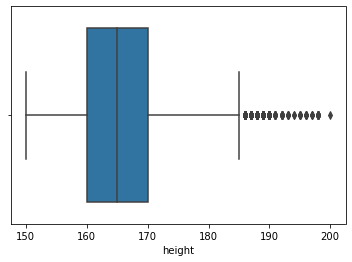

In [22]:
sns.boxplot(data= data,x='height')


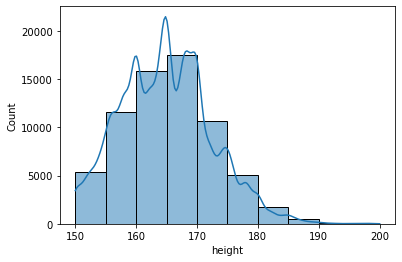

In [23]:
sns.histplot(data.height,kde=True, bins=10)
plt.show()

In [24]:
data.height.describe()

count    68421.000000
mean       164.824294
std          7.457162
min        150.000000
25%        160.000000
50%        165.000000
75%        170.000000
max        200.000000
Name: height, dtype: float64

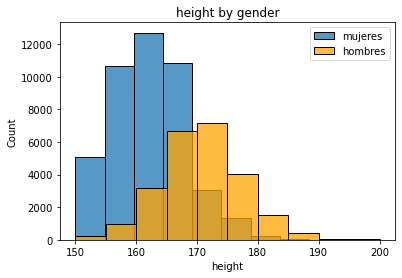

In [94]:
data_male = data[data.gender == 1]
data_male_height= data_male.height


sns.histplot(data_male_height,  kde=False, bins = 10, label='male')

data_fem = data[data.gender == 2]
data_fem_height = data_fem.height
sns.histplot(data_fem_height,  kde=False, label='female', bins = 10, color = 'orange')

plt.xlabel("height")

# Add title
plt.title("height by gender")
plt.legend(["mujeres", 'hombres'])


El **histograma** me sirve para identificar que **1 = female y 2 = male en feature 'gender'**

In [26]:
data.gender.value_counts()
(data.gender.value_counts() / data.shape[0]) * 100  #por height deduzco que '1' = female, '2' = male

1    64.373511
2    35.626489
Name: gender, dtype: float64

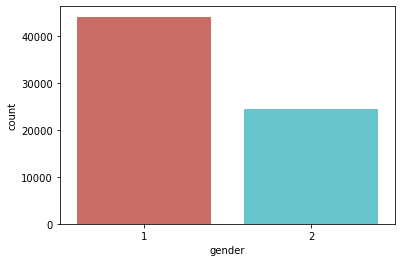

In [27]:
ax = sns.countplot(x="gender", data=data, palette="hls")


**Feature "weight"** 

In [28]:
data.weight.value_counts()

65.0     3793
70.0     3699
68.0     2785
75.0     2709
60.0     2649
         ... 
42.2        1
72.8        1
109.7       1
96.5        1
50.7        1
Name: weight, Length: 277, dtype: int64

In [29]:
data.weight.describe()

count    68421.000000
mean        74.403725
std         14.286223
min         10.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: weight, dtype: float64

<AxesSubplot:xlabel='weight'>

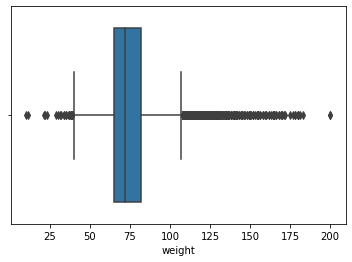

In [30]:
sns.boxplot(data= data,x='weight')


In [32]:
lower_range = 50
upper_range = 200


150
200


In [43]:
data['new_weight'] = data.apply(lambda x: x['height'] - 100 if x['weight'] < 50 else x['weight'], axis = 1)


In [44]:
data['new_weight'].describe()

count    68421.000000
mean        74.537792
std         14.073542
min         50.000000
25%         65.000000
50%         72.000000
75%         82.000000
max        200.000000
Name: new_weight, dtype: float64

In [45]:
data['weight'] = data['new_weight']

<AxesSubplot:xlabel='weight'>

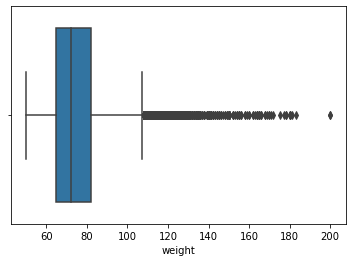

In [46]:
sns.boxplot(data= data,x='weight')


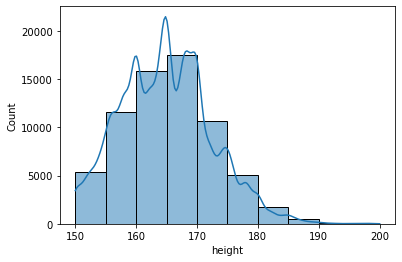

In [47]:

sns.histplot(data.height,kde=True, bins=10)
plt.show()

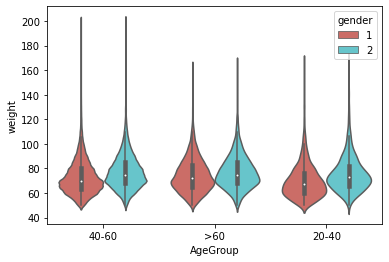

In [48]:
sns.violinplot(x=data.AgeGroup, y=data.weight, hue="gender", data=data, palette="hls")
plt.show()

**Feature "BMI"** 

In [49]:
data.BMI.value_counts()

23.9    1424
24.2    1342
31.2    1036
23.4    1031
24.8     891
        ... 
55.9       1
11.7       1
54.9       1
57.6       1
52.9       1
Name: BMI, Length: 442, dtype: int64

<AxesSubplot:xlabel='BMI'>

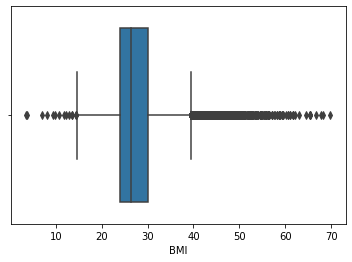

In [50]:
sns.boxplot(data= data,x='BMI')


In [51]:
data.BMI.describe()

count    68421.000000
mean        27.414887
std          5.172745
min          3.500000
25%         23.900000
50%         26.300000
75%         30.100000
max         69.800000
Name: BMI, dtype: float64

In [62]:
#inspecciono feature BMI con valores bajos, se observa BMIs mal calculados
data_out = data[data['BMI'] < 15]
data_out.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,AgeinYr,BMI,BMICat,AgeGroup,AgeCat,new_weight
5359,1,167,67.0,110,80,1,1,0,0,1,0,45,14.7,Under Weight,40-60,"[40, 50)",67.0
9482,2,172,72.0,140,90,1,2,0,0,1,1,57,13.5,Under Weight,40-60,"[50, 60)",72.0
10441,1,162,62.0,100,70,1,1,0,0,1,0,60,14.5,Under Weight,40-60,"[60, 70)",62.0
12914,2,174,74.0,130,100,2,2,0,0,0,1,42,14.9,Under Weight,40-60,"[40, 50)",74.0
16218,1,196,56.0,125,80,1,1,0,0,1,0,53,14.6,Under Weight,40-60,"[50, 60)",56.0


In [71]:
#formula BMI: peso (kg) / [estatura (m)]2
data['BMI'] = ((data['weight'] / (data['height'] ** 2)) * 10000).round(2)
data.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,AgeinYr,BMI,BMICat,AgeGroup,AgeCat,new_weight,new_BMI
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.97,Normal,40-60,"[50, 60)",62.0,21.97
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.93,Obese,40-60,"[50, 60)",85.0,34.93
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.51,Normal,40-60,"[50, 60)",64.0,23.51
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.71,Over Weight,40-60,"[40, 50)",82.0,28.71
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.01,Normal,40-60,"[40, 50)",56.0,23.01


**Feature "BMICat"** 

In [72]:
data.BMICat.value_counts()

Over Weight     25129
Normal          24866
Obese           17818
Under Weight      608
Name: BMICat, dtype: int64

In [73]:
(data.BMICat.value_counts() / data.shape[0]) * 100

Over Weight     36.727028
Normal          36.342643
Obese           26.041712
Under Weight     0.888616
Name: BMICat, dtype: float64

considerando que había muchos errores en BMI y se recalculó feature, se discretiza nuevo calculo de BMI para BMICat

In [84]:

bins = [0, 18.5, 24.9, 29.9, 60]
#puedo crear etiquetar
group_labels = ['bajo peso', 'peso normal', 'sobrepeso', 'obesidad']
data['BMICat'] = pd.cut(data.BMI, bins, labels = group_labels)


In [85]:
data.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,AgeinYr,BMI,BMICat,AgeGroup,AgeCat,new_weight,new_BMI,BMICat2
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.97,peso normal,40-60,"[50, 60)",62.0,21.97,peso normal
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.93,obesidad,40-60,"[50, 60)",85.0,34.93,obesidad
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.51,peso normal,40-60,"[50, 60)",64.0,23.51,peso normal
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.71,sobrepeso,40-60,"[40, 50)",82.0,28.71,sobrepeso
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.01,peso normal,40-60,"[40, 50)",56.0,23.01,peso normal


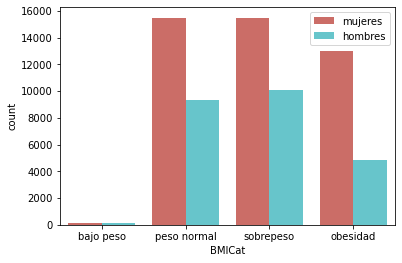

In [93]:
ax = sns.countplot(x="BMICat", data=data, hue= 'gender', palette="hls")
plt.legend(["mujeres", 'hombres'])

**gráficos cruzando variables**

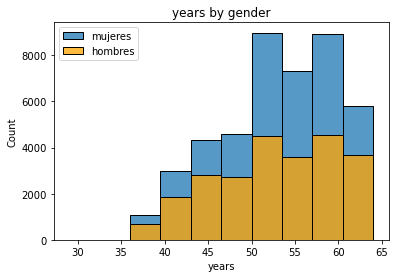

In [92]:
data_male = data[data.gender == 1]
data_male_years = data_male.AgeinYr


sns.histplot(data_male_years,  kde=False, bins = 10, label='male')

data_fem = data[data.gender == 2]
data_fem_years = data_fem.AgeinYr
sns.histplot(data_fem_years,  kde=False, label='female', bins = 10, color = 'orange')

plt.xlabel("years")

# Add title
plt.title("years by gender")
plt.legend(["mujeres", 'hombres'])

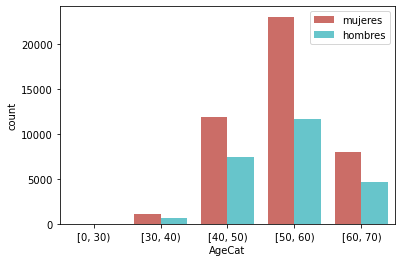

In [91]:
ax = sns.countplot(x="AgeCat", data=data, hue= 'gender', palette="hls")
plt.legend(["mujeres", 'hombres'])

<AxesSubplot:>

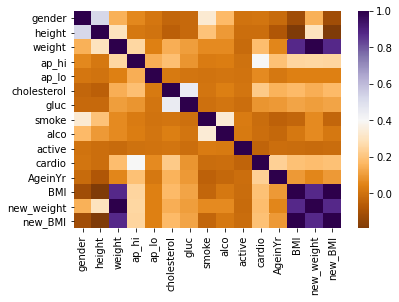

In [88]:
# Calculate correlation between each pair of variable
corr_matrix=data.corr()
 
# plot it
sns.heatmap(corr_matrix, cmap='PuOr')